## Estandarización

**Centrar:** Al restar cada valor con respecto a la media, los valores quedan centralizado con respecto a ésta.

**Reducir:** El valor centralizado es normalizado con respecto a la desviación estándar, es decir, la diferencia del valor y la media es después dividida entre la desviación estándar.

El resultado es una variable aleatoria adimensional (llamada generalmente Z), que tendrá como valor esperado (media) 0 y una varianza y desviación estándar de 1.

Analisis de iris completo
https://www.kaggle.com/ashokdavas/iris-data-analysis-pandas-numpy

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
df = pd.read_csv('../datasets/iris-data.csv')
df.columns

Index(['Unnamed: 0', 'lar.sepalo', 'anc.sepalo', 'lar.petalo', 'anc.petalo',
       'tipo_flor'],
      dtype='object')

In [14]:
df.tipo_flor.value_counts()
y = df['lar.petalo']
y

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: lar.petalo, Length: 150, dtype: float64

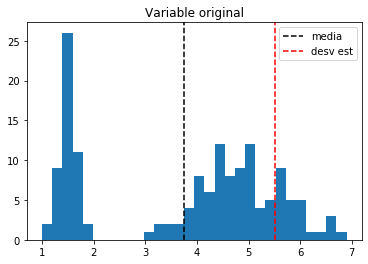

In [15]:
fig, ax = plt.subplots()
ax.set_title('Variable original')
ax.hist(y,bins=30)
ax.axvline(x=np.mean(y), c='k', label='media', linestyle = '--')
ax.axvline(x=np.mean(y) + np.std(y), c='r', label='desv est', linestyle = '--')
ax.legend()

# Centrar

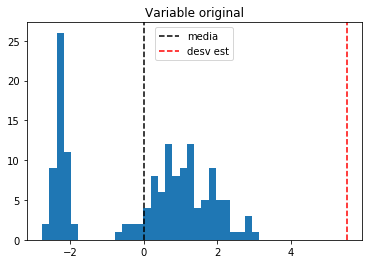

In [17]:
fig, ax = plt.subplots()
ax.set_title('Variable original')
ax.hist(y - np.mean(y), bins=30)
ax.axvline(x = np.mean(y - np.mean(y)), c='k', label='media', linestyle = '--')
ax.axvline(x = np.mean(y) + np.std(y), c='r', label='desv est', linestyle = '--')
ax.legend()

## Reducir

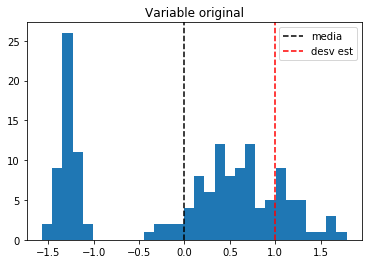

In [21]:
fig, ax = plt.subplots()
ax.set_title('Variable estandarizada')
ax.hist((y - np.mean(y))/np.std(y), bins=30)
ax.axvline(x = np.mean((np.mean(y - np.mean(y))/np.std(y))), c='k', label='media', linestyle = '--')
ax.axvline(x = np.mean((np.mean(y - np.mean(y))/np.std(y))) + np.std((y-np.mean(y))/np.std(y)), c='r', label='desv est', linestyle = '--')
ax.legend()

## Covarianza

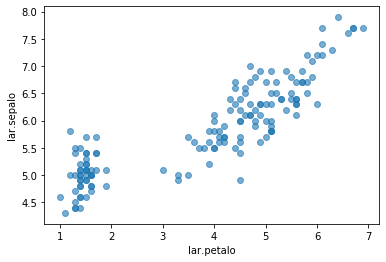

In [26]:
fig, ax = plt.subplots()
ax.scatter(df['lar.petalo'], df['lar.sepalo'], alpha=0.6)
ax.set_xlabel('lar.petalo')
ax.set_ylabel('lar.sepalo')
ax.autoscale()

Es una matriz de 2x2 que arroja:

La relación entre las dos variables que es de 1.27 positiva
Las desviaciones elevadas al cuadrado son 3.11 y 0.68

In [27]:
np.cov(df['lar.petalo'], df['lar.sepalo'])

array([[3.11627785, 1.27431544],
       [1.27431544, 0.68569351]])

## Correlación

In [29]:
# Sperman o kendall
corr = df.corr(method='spearman')
corr

,Unnamed: 0,lar.sepalo,anc.sepalo,lar.petalo,anc.petalo,tipo_flor
Unnamed: 0,1.000000,0.734054,-0.415147,0.867812,0.879963,0.942830
lar.sepalo,0.734054,1.000000,-0.166778,0.881898,0.834289,0.798078
anc.sepalo,-0.415147,-0.166778,1.000000,-0.309635,-0.289032,-0.440290
lar.petalo,0.867812,0.881898,-0.309635,1.000000,0.937667,0.935431
anc.petalo,0.879963,0.834289,-0.289032,0.937667,1.000000,0.938179
tipo_flor,0.942830,0.798078,-0.440290,0.935431,0.938179,1.000000


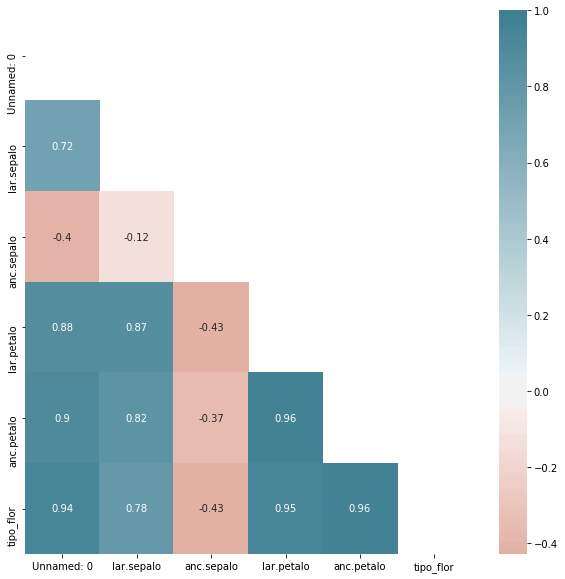

In [38]:
plt.subplots(figsize = (10,10))
mask = np.zeros_like(df.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), cmap=sns.diverging_palette(20,220,n=200), mask = mask,annot = True, center = 0)

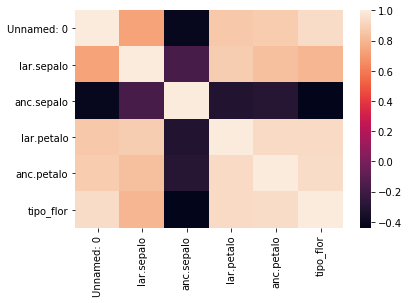

In [34]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

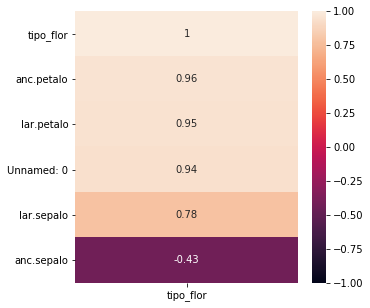

In [35]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr()[['tipo_flor']].sort_values(by=['tipo_flor'], ascending=False).head(50),vmin=-1,annot=True);